In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# Read the images to be aligned
im1 =  cv2.imread('tests/data/20230714235848.jpg');
im2 =  cv2.imread('tests/data/flowers.jpg');
 
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
  warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
  warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
  # Use warpPerspective for Homography
  im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
  # Use warpAffine for Translation, Euclidean and Affine
  im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);

In [15]:
im1_rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2_rgb = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im2_aligned_rgb = cv2.cvtColor(im2_aligned, cv2.COLOR_BGR2RGB)

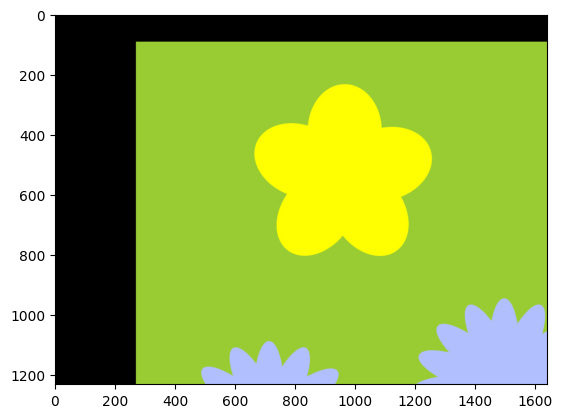

In [17]:
plt.imshow(im2_aligned_rgb)
plt.show()

In [61]:
from __future__ import print_function
import cv2
import numpy as np
 
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15
 
def alignImages(im1, im2):
 
  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
 
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
 
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  # return matches
  matches = list(matches)
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)
  # return matches
  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]
 
  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)
 
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
 
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
 
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)
 
  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
 
  return im1Reg, h

In [46]:
# Read reference image
refFilename = 'tests/data/20230714235848.jpg'
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

# Read image to be aligned
imFilename = 'tests/data/flowers.jpg'
print("Reading image to align : ", imFilename);
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

print("Aligning images ...")
# Registered image will be resotred in imReg.
# The estimated homography will be stored in h.
matches = alignImages(im, imReference)

Reading reference image :  tests/data/20230714235848.jpg
Reading image to align :  tests/data/Flowers.jpg
Aligning images ...


In [52]:
test = matches

In [54]:
test = list(test)

In [59]:
test.sort(key=lambda x: x.distance, reverse=False)

In [60]:
test

[< cv2.DMatch 0x151d39b70>,
 < cv2.DMatch 0x151d39490>,
 < cv2.DMatch 0x151d394b0>,
 < cv2.DMatch 0x151d39510>,
 < cv2.DMatch 0x151d39bb0>,
 < cv2.DMatch 0x151cd98b0>,
 < cv2.DMatch 0x151d38510>,
 < cv2.DMatch 0x151d388d0>,
 < cv2.DMatch 0x151d38cf0>,
 < cv2.DMatch 0x151d39030>,
 < cv2.DMatch 0x151d39390>,
 < cv2.DMatch 0x151d394f0>,
 < cv2.DMatch 0x151d39ff0>,
 < cv2.DMatch 0x1510726b0>,
 < cv2.DMatch 0x151072a90>,
 < cv2.DMatch 0x1510723f0>,
 < cv2.DMatch 0x151072b10>,
 < cv2.DMatch 0x151cd9870>,
 < cv2.DMatch 0x151d07270>,
 < cv2.DMatch 0x151d388b0>,
 < cv2.DMatch 0x151d38a50>,
 < cv2.DMatch 0x151d38b30>,
 < cv2.DMatch 0x151d38bb0>,
 < cv2.DMatch 0x151d38e70>,
 < cv2.DMatch 0x151d396f0>,
 < cv2.DMatch 0x151d39710>,
 < cv2.DMatch 0x151d397b0>,
 < cv2.DMatch 0x151d39a10>,
 < cv2.DMatch 0x151d39b90>,
 < cv2.DMatch 0x151d39dd0>,
 < cv2.DMatch 0x151d39e50>,
 < cv2.DMatch 0x151d3a070>,
 < cv2.DMatch 0x151071f30>,
 < cv2.DMatch 0x1510726d0>,
 < cv2.DMatch 0x151072ab0>,
 < cv2.DMatch 0x1510

In [62]:
# Read reference image
refFilename = 'tests/data/20230714235848.jpg'
print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

# Read image to be aligned
imFilename = 'tests/data/flowers.jpg'
print("Reading image to align : ", imFilename);
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

print("Aligning images ...")
# Registered image will be resotred in imReg.
# The estimated homography will be stored in h.
imReg, h = alignImages(im, imReference)

# Write aligned image to disk.
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, imReg)

# Print estimated homography
print("Estimated homography : \n",  h)

Reading reference image :  tests/data/20230714235848.jpg
Reading image to align :  tests/data/Flowers.jpg
Aligning images ...
Saving aligned image :  aligned.jpg
Estimated homography : 
 [[ 4.29601562e-01 -7.80450460e-01  9.11594464e+02]
 [ 3.31354545e-01 -6.01598699e-01  7.02612546e+02]
 [ 4.71431806e-04 -8.56158110e-04  1.00000000e+00]]


# SIFT

In [64]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img2 = cv.imread('tests/data/20230714235848.jpg', cv.IMREAD_GRAYSCALE)  # referenceImage
img1 = cv.imread('tests/data/flowers.jpg', cv.IMREAD_GRAYSCALE)  # sensedImage

# Initiate SIFT detector
sift_detector = cv.SIFT_create()
# Find the keypoints and descriptors with SIFT
kp1, des1 = sift_detector.detectAndCompute(img1, None)
kp2, des2 = sift_detector.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Filter out poor matches
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append(m)

matches = good_matches
        
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find homography
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Warp image 1 to align with image 2
img1Reg = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))
cv.imwrite('aligned_img1.jpg', img1Reg)

True

: 